In [15]:
import sys
sys.path.append('../Data_Feature')
sys.path.append('../Datasets')
print(sys.path)
import numpy as np
import os
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
import zipfile 

'''
Data prep and feature mapping
'''

os.chdir('../Datasets')
# Paths to your uploaded files
zip_file_path_KO = "terms_KO.zip"
csv_file_name_KO = 'terms_KO.csv'
zip_file_path_traits = 'assembledDataset.zip'
csv_file_name_traits = 'assembledDataset.csv'

# Read and preprocess KO terms
with zipfile.ZipFile(zip_file_path_KO, 'r') as zip_ref:
    with zip_ref.open(csv_file_name_KO) as file:
        KOs = pd.read_csv(file, index_col=0)

KOs['value'] = 1
X_terms = KOs.pivot_table(index='key', columns='KO', values='value', fill_value=0)


# Apply VarianceThreshold to remove constant features
selector = VarianceThreshold(threshold=0.01)
X_filtered = selector.fit_transform(X_terms)
X_filtered_df = pd.DataFrame(X_filtered, index=X_terms.index, columns=X_terms.columns[selector.get_support()])

# Optionally, inspect the variance of features to confirm removal
feature_variances = X_filtered_df.var()
print(f"Features with zero variance after filtering: {sum(feature_variances == 0)}")

# Read and preprocess traits data
with zipfile.ZipFile(zip_file_path_traits, 'r') as zip_ref:
    with zip_ref.open(csv_file_name_traits) as file:
        traits = pd.read_csv(file, low_memory=False, sep=';')

# Handle missing values and prepare data for trophic levels
traits['trophy'] = traits['trophy'].str.lower()  # assuming trophic levels are stored as strings
traits = traits.dropna(subset=['trophy'])

# Define binary labels for each trophic level
trophic_levels = ['photo', 'chemo', 'mixed', 'litho', 'hetero', 'organo', 'auto']

# Initialize a dictionary to store data for each trophic level
binary_labels = {}

for trophy in trophic_levels:
    binary_labels[trophy] = traits['trophy'].apply(lambda x: 1 if trophy in x else 0)

# Combine binary labels into a DataFrame
y = pd.DataFrame(binary_labels)

# Align X (features) and Y (labels) based on common keys
common_keys = X_filtered_df.index.intersection(y.index)
X_aligned = X_filtered_df.loc[common_keys]
Y_aligned = y.loc[common_keys]

# Ensures X_aligned and Y_aligned are aligned
assert X_aligned.shape[0] == Y_aligned.shape[0], "X and Y are not aligned"

#print(X_aligned.shape)
#print(Y_aligned.shape)

traits.dropna(subset='trophy').query("database =='bacdive'")['trophy'].value_counts().head(10)

['c:\\Users\\Elijah\\Documents\\THESIS\\Eliah-Masters\\KOs', 'C:\\Program Files\\PerkinElmerInformatics\\ChemOffice2020\\ChemScript\\Lib', 'c:\\Python312\\python312.zip', 'c:\\Python312\\DLLs', 'c:\\Python312\\Lib', 'c:\\Python312', '', 'C:\\Users\\Elijah\\AppData\\Roaming\\Python\\Python312\\site-packages', 'C:\\Users\\Elijah\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32', 'C:\\Users\\Elijah\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib', 'C:\\Users\\Elijah\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin', 'c:\\Python312\\Lib\\site-packages', '../Data_Feature', '../Datasets', '../Data_Feature', '../Datasets', '../Data_Feature', '../Datasets', '../Data_Feature', '../Datasets', '../Data_Feature', '../Datasets', '../Data_Feature', '../Datasets', '../Data_Feature', '../Datasets', '../Data_Feature', '../Datasets', '../Data_Feature', '../Datasets', '../Data_Feature', '../Datasets', '../Data_Feature', '../Datasets', '../Data_Feature', '../Dataset

trophy
chemoorganotroph          175
chemoheterotroph           61
heterotroph                53
chemoorganoheterotroph     40
chemolithoautotroph        34
chemoautolithotroph         8
organoheterotroph           6
methylotroph                5
phototroph                  5
autotroph                   5
Name: count, dtype: int64

In [ ]:
''' Calculating Pearsons coefficient'''

# Always look at data, right?
print(X_aligned.head())


'''Handelig data values'''

# Checking datatype for y_algned, i think
class_distribution = pd.Series(Y_aligned).value_counts()
print("Class distribution in Y_aligned:", class_distribution)

# Checks data label of Y algined
unique_labels = np.unique(Y_aligned)
print(f"Unique labels in Y_aligned: {unique_labels}")

# Initialize the LabelEncoder and transform the data from catagorical
label_encoder = LabelEncoder()
Y_aligned = label_encoder.fit_transform(Y_aligned)

# Check data once labelencoder is done
print(f"Data of Y_aligned: {np.unique(Y_aligned)}")


# Calculate Pearson correlation coefficients
corr_coefficients = [] # Collectes coefficents from X_aligned and Y_aligned calculations

# I should probably check how pearsons actually works


for column in X_aligned.columns: # Iterates over every column in X_aligned
    # Easier to check all the different collumns because its a pandas data frame
    # Interger indexing is cool but i dont like it
    r, p = pearsonr(X_aligned[column], Y_aligned)  
    corr_coefficients.append(r)


# PLotting
plt.figure(figsize=(10, 6))
plt.hist(corr_coefficients, bins=100, color='red', edgecolor='black')
plt.title('Correlations')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




Processing trophic level: photo
Fitting 5 folds for each of 189 candidates, totalling 945 fits


c:\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   9   93  130  133  134  135  167  176  194  314  322  326  329  351
  373  403  408  415  433  456  473  522  548  583  650  664  703  729
  792  874  938  964 1124 1136 1144 1149 1291 1319 1364 1366 1368 1369
 1416 1494 1510 1528 1565 1572 1573 1603 1604 1613 1703 1704 1722 1723
 1724 1743 1762 1774 1779 1801 1802 1811 1814 1819 1825 1827 1892 1906
 1938 1961 2001 2024 2025 2033 2046 2053 2078 2102 2212 2214 2274 2296
 2309 2340 2395 2436 2443 2470 2471 2474 2484 2485 2486 2487 2488 2497
 2498 2508 2539 2580 2618 2620 2621 2622 2623 2639 2642 2668 2671 2698
 2717 2742 2769 2824 2828 2833 2834 2848 2864 2876 2880 2887 2889 3003
 3008 3012 3020 3021 3023 3026 3033 3036 3039 3084 3093 3095 3097 3098
 3103 3119 3133 3149 3154 3178 3179 3187 3195 3206 3210 3240 3270 3338
 3342 3448 3533 3538 3539 3540 3544 3596 3599 3605 3614 3618 3624 3653
 3715 3716 3719 3721 3779 3789 3793 379

Best parameters found for photo: {'estimator': RandomForestClassifier(random_state=42), 'estimator__max_depth': 5, 'estimator__n_estimators': 100, 'select_k__k': 100}
Best cross-validation score for photo: 0.968
Matthews Correlation Coefficient for photo: 0.693


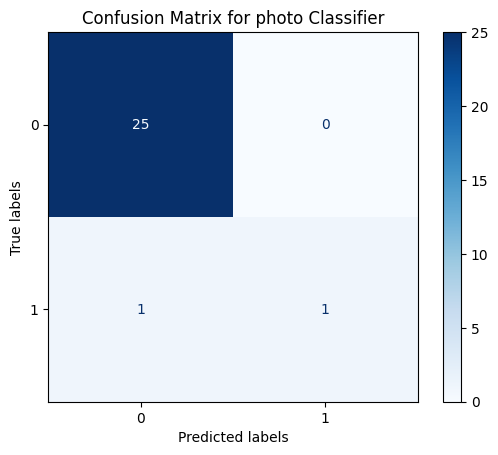

Processing trophic level: chemo
Fitting 5 folds for each of 189 candidates, totalling 945 fits


c:\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   9   90   93  130  167  194  307  314  322  326  329  351  373  408
  415  429  433  456  548  583  650  664  703  729  938  964 1124 1136
 1144 1149 1177 1291 1319 1364 1369 1400 1416 1477 1494 1510 1528 1565
 1572 1573 1603 1604 1613 1614 1702 1703 1704 1722 1723 1724 1743 1762
 1774 1779 1801 1802 1814 1819 1825 1892 1906 1907 1908 1909 1910 1911
 1914 1915 1929 1955 1961 2001 2024 2025 2033 2046 2053 2102 2120 2212
 2214 2296 2309 2334 2340 2395 2436 2443 2470 2471 2474 2484 2485 2486
 2487 2488 2497 2498 2508 2539 2541 2542 2580 2618 2620 2621 2622 2623
 2639 2642 2668 2671 2698 2717 2742 2769 2795 2811 2824 2828 2833 2848
 2864 2880 2887 2889 3008 3020 3023 3033 3093 3103 3115 3119 3133 3149
 3154 3187 3195 3210 3240 3270 3338 3345 3436 3448 3524 3538 3541 3596
 3605 3618 3624 3625 3653 3698 3715 3768 3779 3789 3793 3807 3811 3826
 3847 3873 3925 3927 3941 3944 3947 395

Best parameters found for chemo: {'estimator': LogisticRegression(), 'estimator__C': 0.1, 'select_k__k': 200}
Best cross-validation score for chemo: 0.918
Matthews Correlation Coefficient for chemo: 0.470


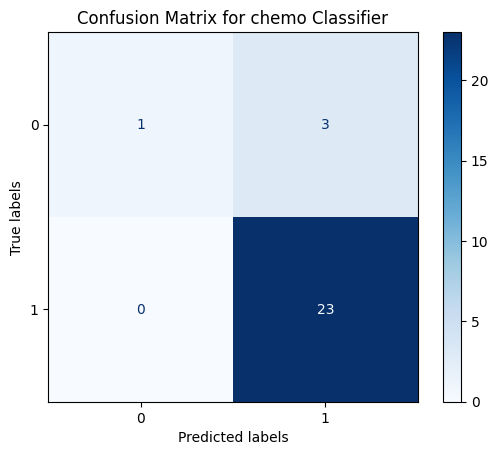

Processing trophic level: mixed
Fitting 5 folds for each of 189 candidates, totalling 945 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
595 fits failed out of a total of 945.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Py

Best parameters found for mixed: {'estimator': RandomForestClassifier(random_state=42), 'estimator__max_depth': 5, 'estimator__n_estimators': 100, 'select_k__k': 10}
Best cross-validation score for mixed: 1.000
Matthews Correlation Coefficient for mixed: 0.000


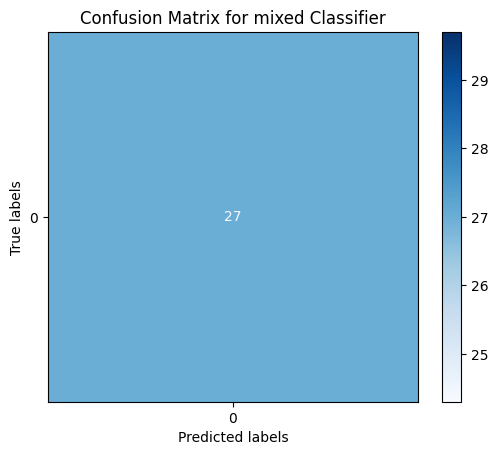

Processing trophic level: litho
Fitting 5 folds for each of 189 candidates, totalling 945 fits


c:\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   9   90   93  133  134  135  167  176  194  204  314  322  326  329
  351  373  403  408  415  424  433  456  473  522  548  583  607  650
  664  703  729  792  938  964 1115 1136 1144 1149 1167 1291 1319 1364
 1366 1368 1369 1416 1494 1509 1528 1565 1572 1573 1603 1604 1703 1704
 1722 1723 1724 1762 1774 1779 1801 1811 1819 1825 1892 1906 1907 1908
 1909 1910 1911 1914 1915 1928 1929 1938 1961 2023 2024 2025 2026 2033
 2046 2053 2078 2101 2102 2120 2212 2214 2274 2296 2309 2395 2436 2443
 2470 2484 2485 2486 2487 2488 2497 2498 2508 2539 2580 2618 2620 2621
 2622 2623 2639 2642 2668 2669 2671 2698 2717 2742 2795 2811 2824 2828
 2833 2848 2864 2876 2880 2887 2889 2919 3003 3008 3012 3020 3021 3023
 3024 3026 3033 3036 3039 3084 3093 3095 3097 3098 3103 3115 3119 3133
 3149 3166 3179 3187 3195 3210 3240 3270 3338 3342 3394 3448 3524 3538
 3544 3569 3591 3596 3599 3605 3618 362

Best parameters found for litho: {'estimator': SVC(random_state=42), 'estimator__C': 1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear', 'select_k__k': 10}
Best cross-validation score for litho: 0.886
Matthews Correlation Coefficient for litho: 0.516


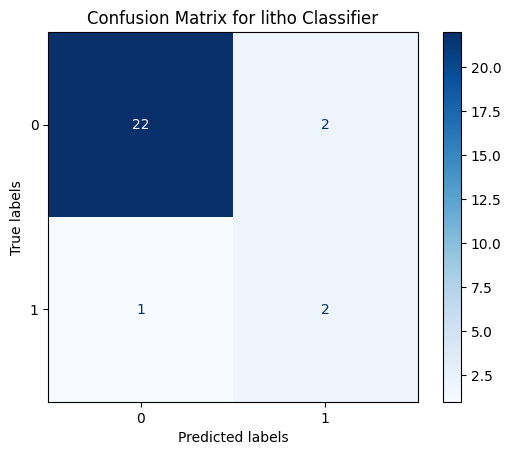

Processing trophic level: hetero
Fitting 5 folds for each of 189 candidates, totalling 945 fits


c:\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   9   90   93  167  176  194  314  322  326  329  351  373  408  415
  433  456  473  548  583  650  664  703  938  964 1115 1136 1144 1149
 1166 1291 1319 1364 1366 1368 1400 1416 1494 1528 1572 1573 1603 1604
 1722 1723 1724 1762 1774 1779 1801 1819 1825 1892 1906 1961 1963 2023
 2024 2025 2033 2046 2053 2102 2212 2214 2246 2296 2395 2436 2470 2484
 2485 2486 2487 2488 2497 2498 2508 2539 2541 2542 2580 2618 2620 2621
 2622 2623 2639 2642 2668 2669 2671 2698 2717 2736 2742 2791 2811 2824
 2828 2833 2834 2848 2864 2880 2887 2889 3008 3012 3020 3023 3032 3033
 3084 3093 3098 3103 3119 3133 3149 3178 3187 3195 3206 3210 3236 3240
 3247 3270 3313 3338 3345 3369 3394 3448 3538 3574 3596 3605 3618 3624
 3669 3715 3716 3728 3735 3737 3779 3789 3807 3811 3826 3847 3927 3941
 3947 3975 3976 3977 3978 3979 3980 4015 4048 4049 4051 4053 4060 4063
 4094 4109 4124 4134 4137 4143 4200 420

Best parameters found for hetero: {'estimator': LogisticRegression(), 'estimator__C': 1, 'select_k__k': 50}
Best cross-validation score for hetero: 0.853
Matthews Correlation Coefficient for hetero: 0.593


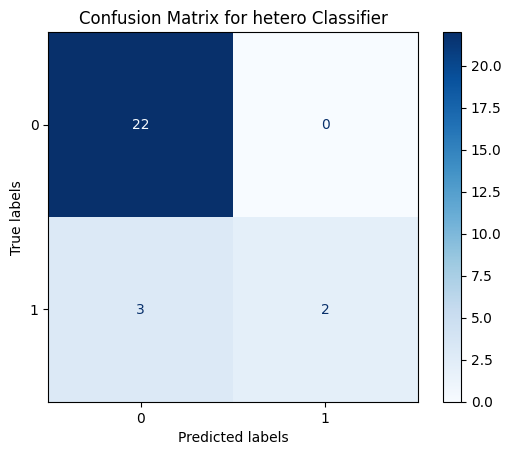

Processing trophic level: organo
Fitting 5 folds for each of 189 candidates, totalling 945 fits


c:\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   9   90   93  119  139  167  176  194  244  291  314  322  326  329
  351  368  373  408  415  433  435  456  473  540  548  583  650  664
  703  725  795  938  964  986 1021 1116 1136 1144 1149 1291 1319 1364
 1366 1368 1369 1416 1494 1528 1532 1572 1573 1603 1604 1722 1723 1724
 1734 1735 1736 1762 1774 1779 1801 1811 1819 1825 1892 1906 1929 1961
 2023 2024 2025 2029 2033 2046 2053 2102 2212 2214 2296 2395 2436 2469
 2470 2484 2485 2486 2487 2488 2497 2498 2508 2539 2541 2542 2558 2580
 2618 2620 2621 2622 2623 2624 2638 2639 2642 2668 2671 2698 2717 2742
 2811 2824 2828 2833 2848 2864 2880 2887 2889 3000 3001 3002 3003 3004
 3005 3008 3009 3012 3015 3017 3020 3021 3023 3026 3030 3033 3035 3036
 3039 3044 3048 3052 3084 3087 3091 3093 3095 3097 3098 3099 3101 3103
 3119 3123 3124 3125 3133 3149 3178 3187 3195 3206 3210 3240 3270 3338
 3345 3394 3448 3489 3524 3538 3591 359

Best parameters found for organo: {'estimator': SVC(random_state=42), 'estimator__C': 0.1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear', 'select_k__k': 10}
Best cross-validation score for organo: 0.803
Matthews Correlation Coefficient for organo: 0.478


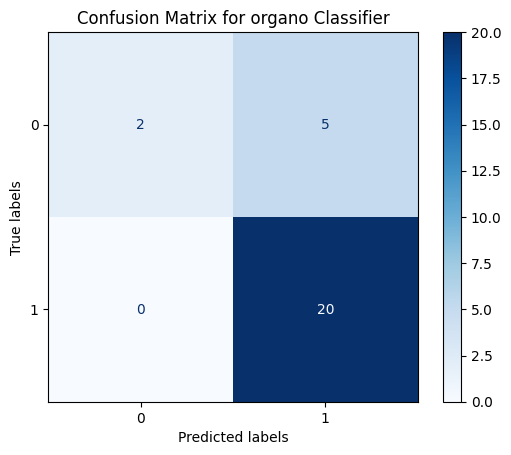

Processing trophic level: auto
Fitting 5 folds for each of 189 candidates, totalling 945 fits


c:\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   9   93  129  130  131  132  146  167  176  194  203  264  299  307
  314  322  325  326  329  351  373  408  415  429  433  456  473  548
  583  607  650  664  703  792  825  938  964 1124 1136 1144 1149 1291
 1319 1364 1366 1368 1416 1477 1494 1509 1510 1528 1572 1573 1603 1604
 1613 1693 1722 1723 1724 1743 1762 1764 1774 1779 1801 1802 1814 1819
 1825 1892 1906 1961 2001 2024 2025 2046 2078 2102 2120 2212 2214 2274
 2296 2340 2395 2436 2470 2471 2474 2497 2498 2508 2539 2580 2615 2616
 2618 2620 2621 2622 2623 2639 2641 2642 2659 2668 2671 2698 2717 2742
 2769 2795 2824 2828 2833 2848 2864 2880 2887 2902 2908 2919 3008 3010
 3011 3012 3020 3023 3031 3033 3084 3090 3093 3098 3103 3110 3115 3119
 3133 3149 3154 3178 3187 3192 3195 3210 3240 3247 3270 3273 3309 3325
 3338 3379 3401 3436 3448 3533 3538 3539 3540 3572 3584 3591 3596 3599
 3605 3618 3624 3653 3674 3715 3716 371

Best parameters found for auto: {'estimator': SVC(random_state=42), 'estimator__C': 1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear', 'select_k__k': 10}
Best cross-validation score for auto: 0.919
Matthews Correlation Coefficient for auto: 0.460


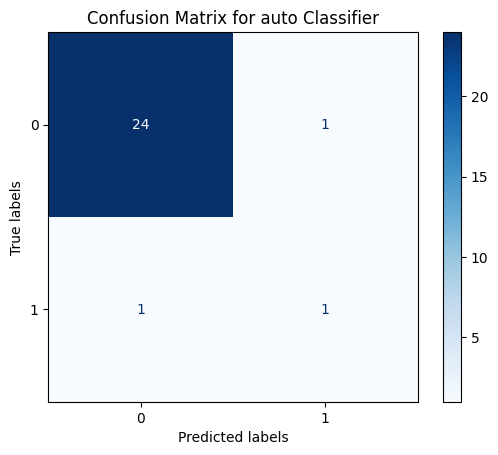

Trophic Level: photo
Best Parameters: {'estimator': RandomForestClassifier(random_state=42), 'estimator__max_depth': 5, 'estimator__n_estimators': 100, 'select_k__k': 100}
Best Cross-Validation Score: 0.968
MCC: 0.693
Confusion Matrix:
[[25  0]
 [ 1  1]]

Trophic Level: chemo
Best Parameters: {'estimator': LogisticRegression(), 'estimator__C': 0.1, 'select_k__k': 200}
Best Cross-Validation Score: 0.918
MCC: 0.470
Confusion Matrix:
[[ 1  3]
 [ 0 23]]

Trophic Level: mixed
Best Parameters: {'estimator': RandomForestClassifier(random_state=42), 'estimator__max_depth': 5, 'estimator__n_estimators': 100, 'select_k__k': 10}
Best Cross-Validation Score: 1.000
MCC: 0.000
Confusion Matrix:
[[27]]

Trophic Level: litho
Best Parameters: {'estimator': SVC(random_state=42), 'estimator__C': 1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear', 'select_k__k': 10}
Best Cross-Validation Score: 0.886
MCC: 0.516
Confusion Matrix:
[[22  2]
 [ 1  2]]

Trophic Level: hetero
Best Parameters: {'estim

In [3]:

def train_and_evaluate(X_aligned, Y_aligned, trophic_levels):
    results = {}

    for trophic_level in trophic_levels:
        print(f"Processing trophic level: {trophic_level}")
        
        # Binary labels for the current trophic level
        Y_current = Y_aligned[trophic_level].values
        
        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X_aligned, Y_current, test_size=0.3, random_state=42, stratify=Y_current)
        
        # Define a pipeline
        pipeline = Pipeline([
            ('select_k', SelectKBest(f_classif)),
            ('estimator', RandomForestClassifier())
        ])

        # Define a parameter grid to search over
        param_grid = [
            {
                'select_k__k': [10, 50, 100, 200, 300, 500, 1000],
                'estimator': [RandomForestClassifier(random_state=42)],
                'estimator__n_estimators': [100, 200],
                'estimator__max_depth': [5, 10, None]
            },
            {
                'select_k__k': [10, 50, 100, 200, 300, 500, 1000],
                'estimator': [SVC(random_state=42)],
                'estimator__C': [0.1, 1, 10],
                'estimator__kernel': ['linear', 'rbf'],
                'estimator__gamma': ['scale', 'auto']
            },
            {
                'select_k__k': [10, 50, 100, 200, 300, 500, 1000],
                'estimator': [LogisticRegression()],
                'estimator__C': [0.01, 0.1, 1, 10, 100]
            },
            {
                'select_k__k': [10, 50, 100, 200, 300, 500, 1000],
                'estimator': [BernoulliNB()],
                'estimator__alpha': [0.01, 0.1, 1.0, 10.0],
                'estimator__binarize': [0.0]
            }
        ]
        
        # Grid search
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, Y_train)

        print(f"Best parameters found for {trophic_level}:", grid_search.best_params_)
        print(f"Best cross-validation score for {trophic_level}: {grid_search.best_score_:.3f}")

        # Evaluate the best model on the test set
        best_model = grid_search.best_estimator_
        Y_pred = best_model.predict(X_test)

        mcc = matthews_corrcoef(Y_test, Y_pred)
        print(f"Matthews Correlation Coefficient for {trophic_level}: {mcc:.3f}")

        # Display confusion matrix using Seaborn heatmap for better visualization
        cm = confusion_matrix(Y_test, Y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Confusion Matrix for {trophic_level} Classifier')
        plt.show()
        
        # Store results
        results[trophic_level] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'mcc': mcc,
            'confusion_matrix': cm
        }

    # Print final results
    for trophic_level, result in results.items():
        print(f"Trophic Level: {trophic_level}")
        print(f"Best Parameters: {result['best_params']}")
        print(f"Best Cross-Validation Score: {result['best_score']:.3f}")
        print(f"MCC: {result['mcc']:.3f}")
        print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")

# Run the function with your data
train_and_evaluate(X_aligned, Y_aligned, trophic_levels)


In [ ]:
''' Finding best traits using f-scpre'''

'''# Finding most predictive features with respect to target value (oxygen)
select_k_best = SelectKBest(f_classif, k=10)  
X_new = select_k_best.fit_transform(X_aligned, Y_aligned)
selected_features = select_k_best.get_support(indices=True)

# Get the names of the selected KO terms
selected_ko_terms = X_aligned.columns[selected_features]

# Fitting select K best to find the scores
select_k_best.fit(X_aligned, Y_aligned)
scores = select_k_best.scores_[selected_features] # scores of selected features

# Sorting features by their scores
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]
sorted_features = selected_ko_terms[sorted_indices]

print("Most selected KO terms for predicting oxygen trait in hierchical manner (F score):")
print(sorted_features)

#Plot for visualizing distribution and importance of best traits

# Translate selected KO terms to their descriptions
selected_ko_terms_list = list(sorted_features)  
ko_descriptions_mapping = translate_ko_terms(selected_ko_terms_list)


# Replace KO terms with their descriptions for plotting
translated_sorted_features = [ko_descriptions_mapping[ko] for ko in sorted_features]

# Plotting with translated names
plt.figure(figsize=(10, 8))
plt.bar(range(len(translated_sorted_features)), sorted_scores)
plt.xticks(range(len(translated_sorted_features)), translated_sorted_features, rotation='vertical', fontsize=8)
plt.xlabel('KO Descriptions')
plt.ylabel('F-scores')
plt.title('Top 50 KO Descriptions by F-score')
plt.tight_layout()
plt.show()
'''

In [ ]:
''' Model based feature importance score '''

#Fit a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_aligned, Y_aligned)

#Rank features by their importances
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 features
top_k_indices = sorted_indices[:10]
selected_features = X_aligned.columns[top_k_indices]

# Scores of selected features
sorted_scores = feature_importances[top_k_indices]

print("Most selected KO terms for predicting oxygen trait in hierchical manner based on randomforest classifier:")
print("This is model based feature importance (uses models own feature importance score to evaluate most important ones)")
print(selected_features)

#Translate selected KO terms to their descriptions
translated_sorted_features = translate_ko_terms(list(selected_features))

# Prepare labels and scores for plotting
labels = [translated_sorted_features[ko] for ko in selected_features]
sorted_labels = [labels[idx] for idx in range(len(labels))]

# Plotting with translated names
plt.figure(figsize=(10, 8))
plt.bar(range(len(sorted_labels)), sorted_scores)
plt.xticks(range(len(sorted_labels)), selected_features, rotation='vertical', fontsize=8)
plt.xlabel('KO Descriptions')
plt.ylabel('Importance Scores')
plt.title('Top 10 KO Descriptions for Random forests')
plt.tight_layout()
plt.show()


''' For logsitc regression'''

#Fit a LogisticRegression model
lr_model = LogisticRegression()
lr_model.fit(X_aligned, Y_aligned)

#Rank features by their coefficients
lr_coefficients = lr_model.coef_[0]
sorted_indices_lr = np.argsort(np.abs(lr_coefficients))[::-1]

# Select the top 10 features
top_k_indices_lr = sorted_indices_lr[:10]
selected_features_lr = X_aligned.columns[top_k_indices_lr]

# Coefficients (importance) of selected features
sorted_scores_lr = lr_coefficients[top_k_indices_lr]

print("Most selected KO terms for predicting oxygen trait in hierchical manner based on logistic regression:")
print("This is model based feature importance (uses model's coefficients as importance scores)")
print(selected_features_lr)

#Translate selected KO terms to their descriptions
translated_sorted_features = translate_ko_terms(list(selected_features_lr))

# Prepare labels and scores for plotting
labels_lr = [translated_sorted_features[ko] for ko in selected_features_lr]
sorted_labels_lr = [labels[idx] for idx in range(len(labels))]

# Plotting with translated names
plt.figure(figsize=(10, 8))
plt.bar(range(len(sorted_labels_lr)), np.abs(sorted_scores_lr))  # Use absolute value for visualization
plt.xticks(range(len(sorted_labels_lr)), translated_sorted_features, rotation='vertical', fontsize=8)
plt.xlabel('KO Descriptions')
plt.ylabel('Coefficient Magnitudes')
plt.title('Top 10 KO Descriptions for Logistic Regression')
plt.tight_layout()
plt.show()


In [ ]:
# Visualize Feature Importance for each trophic level
for trophic in trophic_levels:
    print(f"\nFeature importance for {trophic}:")
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_aligned, Y_aligned[trophic].values)
    
    feature_importances = model.feature_importances_
    sorted_indices = np.argsort(feature_importances)[::-1]
    
    top_k_indices = sorted_indices[:10]
    selected_features = X_aligned.columns[top_k_indices]
    
    sorted_scores = feature_importances[top_k_indices]
    
    print(f"Top KO terms for {trophic}:")
    print(selected_features)
    
    translated_sorted_features = translate_ko_terms(list(selected_features))
    
    # Plotting
    plt.figure(figsize=(10, 8))
    plt.bar(range(len(selected_features)), sorted_scores)
    plt.xticks(range(len(selected_features)), translated_sorted_features, rotation='vertical', fontsize=8)
    plt.xlabel('KO Descriptions')
    plt.ylabel('Importance Scores')
    plt.title(f'Top 10 KO Descriptions for {trophic}')
    plt.tight_layout()
    plt.show()


In [ ]:
kegg = KEGG()

def translate_ko_terms(ko_terms):
    ko_descriptions = {}
    for ko in ko_terms:
        try:
            result = kegg.find("ko", ko)
            # The result can contain multiple lines if the term has multiple entries; split by newline
            first_line = result.split('\n')[0]
            # Each line is tab-separated with the format: entry_id, description
            _, description = first_line.split('\t', 1)
            ko_descriptions[ko] = description
        except Exception as e:
            print(f"Error retrieving information for {ko}: {e}")
            ko_descriptions[ko] = ko  # Use the KO term itself if the name can't be retrieved
    return ko_descriptions

def map_ko_to_pathways(ko_terms):
    pathways = {}
    for ko in ko_terms:
        try:
            gene_links = kegg.link("pathway", ko)
            if gene_links:
                for entry in gene_links.strip().split("\n"):
                    split_entry = entry.split("\t")
                    if len(split_entry) >= 2:
                        ko_id, pathway_id = split_entry[0], split_entry[1]
                        if pathway_id not in pathways:
                            pathways[pathway_id] = set()
                        pathways[pathway_id].add(ko)
        except Exception as e:
            print(f"Error processing {ko}: {e}")
    return pathways

selected_important_features = selected_features_lr
pathways = map_ko_to_pathways(selected_important_features)
translated_kos = translate_ko_terms(selected_important_features)  

# Creating the adjacency matrix with translated KO terms, including original KO term
pathway_matrix = pd.DataFrame(
    index=[f"{translated_kos[ko]} ({ko})" for ko in selected_important_features],
    columns=pathways.keys(),
    data=0
)
for pathway, kos in pathways.items():
    for ko in kos:
        if ko in selected_important_features:
            pathway_matrix.loc[f"{translated_kos[ko]} ({ko})", pathway] = 1

# Fetch and rename pathway names for readability
pathway_names = {}
for column in pathway_matrix.columns:
    pathway_info = kegg.get(column)
    parsed_info = kegg.parse(pathway_info)
    pathway_name = parsed_info['NAME'][0] if 'NAME' in parsed_info else column
    pathway_names[column] = pathway_name
    pathway_matrix.rename(columns={column: pathway_name}, inplace=True)

print("Pathway matrix after renaming:\n", pathway_matrix)

# Heatmap visualization
sns.heatmap(pathway_matrix, annot=True, cmap="Greys", cbar=False)
plt.title('Adjacency Matrix of KO Terms and Pathways LR')
plt.xlabel('Pathways')
plt.ylabel('KO Terms')
plt.show()

# Initialize a network graph
G = nx.Graph()

# Define a list of general pathways to exclude
excluded_pathways = ["metabolic pathways"]  # You can add more general terms here

# Add nodes and edges with renamed pathway names
for ko in selected_important_features:
    translated_label = f"{translated_kos[ko]} ({ko})"
    G.add_node(ko, title=translated_label, label=translated_label, color='red', size=20)

for pathway_id, kos in pathways.items():
    pathway_info = kegg.get(pathway_id)
    parsed_info = kegg.parse(pathway_info)
    pathway_name = parsed_info['NAME'][0] if 'NAME' in parsed_info else pathway_id
    if pathway_name.lower() not in excluded_pathways:
        G.add_node(pathway_name, title=pathway_name, label=pathway_name, color='blue', size=30)
        for ko in kos:
            G.add_edge(ko, pathway_name)

# Pyvis network visualization
nt = Network("800px", "1200px", notebook=True, heading='Interactive Network of KO Terms and Pathways LR', bgcolor="#ffffff", font_color="black", cdn_resources='remote')
nt.from_nx(G)
nt.toggle_physics(True)
nt.show_buttons(filter_=['physics'])

nt.save_graph("ko_network_lr.html")


In [ ]:

''' TROUBLE SHOOTING '''

# Check the distribution of classes in Y_train
class_distribution = pd.Series(Y_train).value_counts()
print("Class distribution in Y_train:\n", class_distribution)

# Check unique labels in Y_train
unique_labels = np.unique(Y_train)
print(f"Unique labels in Y_train: {unique_labels}")


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform Y_train to encode labels
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Replace Y_train with the encoded labels if necessary
Y_train = Y_train_encoded

# Now, you can inspect the unique values of the encoded Y_train
print(f"Unique encoded labels in Y_train: {np.unique(Y_train)}")


# Check if the number of instances matches
print(f"Number of instances in X_train: {X_train.shape[0]}")
print(f"Number of labels in Y_train: {len(Y_train)}")

In [ ]:
''' Comparing F1 and MCC plots'''

# Define the range of `k` values to explore
k_values = range(1, 1000, 20)  # Range of steps

# Define estimators to compare
estimators = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'SupportVectorMachines': SVC(),
    'LogisticRegression': LogisticRegression(),
    'BernoulliNB': BernoulliNB()
}

# Prepare to store results for both F1 and MCC
results = {name: {'f1': [], 'mcc': []} for name in estimators}

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5)

# Loop over each estimator
for name, estimator in estimators.items():
    print(f"Processing estimator: {name}")  # Debug print
    # Loop over each `k` value
    for k in k_values:
        print(f"Testing with k={k}")  # Debug print
        # Define the pipeline for the current estimator
        pipeline = Pipeline([
            ('select_k', SelectKBest(f_classif, k=k)),
            ('estimator', estimator)
        ])
        
        # Perform cross-validation for F1-score
        f1_scores = cross_val_score(pipeline, X_train, Y_train, cv=cv, scoring=make_scorer(f1_score, average='macro'), n_jobs=-1)
        results[name]['f1'].append(f1_scores.mean())
        
        # Perform cross-validation for MCC
        mcc_scores = cross_val_score(pipeline, X_train, Y_train, cv=cv, scoring=make_scorer(matthews_corrcoef), n_jobs=-1)
        results[name]['mcc'].append(mcc_scores.mean())

# For debugging 
print(results)

''' Plotting '''

# Plotting the results for each estimator for both F1 and MCC
fig, ax = plt.subplots(2, 1, figsize=(12, 16))

for name, scores in results.items():
    k_values_list = list(k_values)  # Convert range to list for indexing
    # F1 Plot
    finite_f1_scores = [score for score in scores['f1'] if np.isfinite(score)]
    finite_k_values_f1 = [k for k, score in zip(k_values_list, scores['f1']) if np.isfinite(score)]
    ax[0].plot(finite_k_values_f1, finite_f1_scores, marker='o', linestyle='-', label=name)
    
    # highest F1 score
    if finite_f1_scores:  # Check if there are any finite scores
        max_f1_score = max(finite_f1_scores)
        max_f1_index = finite_f1_scores.index(max_f1_score)
        best_k_f1 = finite_k_values_f1[max_f1_index]
        ax[0].annotate(f'{max_f1_score:.2f}', (best_k_f1, max_f1_score), textcoords="offset points", xytext=(0,10), ha='center')
    
    # MCC Plot
    finite_mcc_scores = [score for score in scores['mcc'] if np.isfinite(score)]
    finite_k_values_mcc = [k for k, score in zip(k_values_list, scores['mcc']) if np.isfinite(score)]
    ax[1].plot(finite_k_values_mcc, finite_mcc_scores, marker='o', linestyle='-', label=name)

    #  highest MCC score
    if finite_mcc_scores:  # Check if there are any finite scores
        max_mcc_score = max(finite_mcc_scores)
        max_mcc_index = finite_mcc_scores.index(max_mcc_score)
        best_k_mcc = finite_k_values_mcc[max_mcc_index]
        ax[1].annotate(f'{max_mcc_score:.2f}', (best_k_mcc, max_mcc_score), textcoords="offset points", xytext=(0,10), ha='center')

    

ax[0].set_title('F1 Score by Number of Selected Features (k) for Different Estimators')
ax[0].set_xlabel('Number of Features (k)')
ax[0].set_ylabel('F1 Score')

ax[1].set_title('MCC by Number of Selected Features (k) for Different Estimators')
ax[1].set_xlabel('Number of Features (k)')
ax[1].set_ylabel('MCC Score')

for a in ax:
    a.legend()
    a.grid(True)

#plt.tight_layout()
plt.show()

In [ ]:
''' Plot for LR vs RFS

# Fit models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting to aligned matrixes
lr_model.fit(X_aligned, Y_aligned)
rf_model.fit(X_aligned, Y_aligned)

# Get coefficients and feature importances
logistic_importance = np.abs(lr_model.coef_[0])
rf_feature_importance = rf_model.feature_importances_
sorted_indices_rf = np.argsort(rf_feature_importance)[::-1]
sorted_indices_lr = np.argsort(logistic_importance)[::-1]


top_k_indices_rf = sorted_indices_rf[:10]
top_k_indices_lr = sorted_indices_lr[:10]
selected_features_rf = X_aligned.columns[top_k_indices_rf]
selected_features_lr = X_aligned.columns[top_k_indices_lr]

print(selected_features_rf)
print(selected_features_lr)

sorted_scores_rf = rf_feature_importance[top_k_indices_rf]
sorted_scores_lr = logistic_importance[top_k_indices_lr]


# Normalize the importance scores
scaler = MinMaxScaler()
lr_importance_scaled = scaler.fit_transform(logistic_importance.reshape(-1, 1)).flatten()
rf_importance_scaled = scaler.fit_transform(rf_feature_importance.reshape(-1, 1)).flatten()

# Scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(lr_importance_scaled, rf_importance_scaled, alpha=0.6, color='red')

# Line of best fit
m, b = np.polyfit(rf_importance_scaled, lr_importance_scaled, 1)
ax.plot(rf_importance_scaled, m*rf_importance_scaled + b, color='blue')
ax.grid(True)
ax.set_xlabel('Logistic Regression Importance Scores (LR)')
ax.set_ylabel('Random Forest Importance Scores (RFS)')
ax.set_title('Comparison of Feature Importance Scores')

plt.show()

# Important to remember

''' 

#Logistic Regression Coefficients: After normalizing, they represent the relative predictive strength of features, 
#but they lose their direct probabilistic interpretation.

#Random Forest Feature Importances: They indicate how much each feature contributes to the predictive accuracy of the model, 
#based on how much each feature decreases the impurity of the splits.

#Maybe test rankings of features instead of normalized values. Can compare and see which features are consistently considered
#important across both models
'''


# Rank the features by importance for each model
lr_ranking = np.argsort(logistic_importance)[::-1]  # argsort returns indices that would sort the array
rf_ranking = np.argsort(rf_feature_importance)[::-1]


# For visualization
import pandas as pd

feature_names = X_aligned.columns  # For feature names
ranking_df = pd.DataFrame({
    'Feature': feature_names,
    'LR_Rank': lr_ranking.argsort(),
    'RF_Rank': rf_ranking.argsort(),
    'LR_Score': logistic_importance[lr_ranking.argsort()],
    'RF_Score': rf_feature_importance[rf_ranking.argsort()]
})


# Select top features by rank threshold or specific indices if needed
top_n = 10
ranking_df['Top_LR'] = ranking_df['LR_Rank'] < top_n
ranking_df['Top_RF'] = ranking_df['RF_Rank'] < top_n

# Now print or use this DataFrame for visualization
print(ranking_df.head(20))  # Display the first 20 entries for checking

''' 
# Sorts based on logisitc regression rank
#ranking_df.sort_values('LR_Rank', inplace=True)
# Can also sort by 'RF_Rank' 
# Ranks from random forests
#print(ranking_df[['Feature', 'LR_Rank', 'RF_Rank']].head(100))
# This shows the top 20 features as ranked by logistic regression, alongside their ranks in random forest
'''

# To find features that are consistently considered important, look for low rank numbers in both models
consistently_important_features = ranking_df[(ranking_df['LR_Rank'] < 100) & (ranking_df['RF_Rank'] < 100)]
print(consistently_important_features)



"importance" in logistic regression is based on the magnitude of the coefficients (which reflect the odds of the outcome), 
#while in random forests, importance is derived from how much a feature decreases the impurity of the splits.
'''

In [ ]:
# Assume X_aligned and Y_aligned are defined and appropriate for model fitting

# Fit models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting to aligned matrices
lr_model.fit(X_aligned, Y_aligned)
rf_model.fit(X_aligned, Y_aligned)

# Get coefficients and feature importances
logistic_importance = np.abs(lr_model.coef_[0])
rf_feature_importance = rf_model.feature_importances_

# Rank the features by importance for each model
lr_ranking = np.argsort(logistic_importance)[::-1]  # argsort returns indices that would sort the array
rf_ranking = np.argsort(rf_feature_importance)[::-1]

# Normalize the importance scores
scaler = MinMaxScaler()
lr_importance_scaled = scaler.fit_transform(logistic_importance.reshape(-1, 1)).flatten()
rf_importance_scaled = scaler.fit_transform(rf_feature_importance.reshape(-1, 1)).flatten()


# Scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(lr_importance_scaled, rf_importance_scaled, alpha=0.6, color='red')

# Line of best fit
m, b = np.polyfit(rf_importance_scaled, lr_importance_scaled, 1)
ax.plot(rf_importance_scaled, m*rf_importance_scaled + b, color='blue')
ax.grid(True)
ax.set_xlabel('Logistic Regression Importance Scores (LR)')
ax.set_ylabel('Random Forest Importance Scores (RFS)')
ax.set_title('Comparison of Feature Importance Scores')

plt.show()


# For visualization
feature_names = X_aligned.columns  # Assuming your DataFrame columns are the feature names
ranking_df = pd.DataFrame({
    'Feature': feature_names,
    'LR_Rank': lr_ranking.argsort(),  # Convert indices to rank positions
    'RF_Rank': rf_ranking.argsort(),
    'LR_Score': logistic_importance[lr_ranking.argsort()],  # Order scores by original feature order
    'RF_Score': rf_feature_importance[rf_ranking.argsort()]
})

# Sort DataFrame based on what is needed
ranking_df.sort_values('RF_Rank', ascending=True, inplace=True)

# Select top features by rank threshold or specific indices if needed
top_n = 10
ranking_df['Top_LR'] = ranking_df['LR_Rank'] < top_n
ranking_df['Top_RF'] = ranking_df['RF_Rank'] < top_n

# Display the first 20 entries for checking
print(ranking_df.head(20))

# To find features that are consistently considered important, look for low rank numbers in both models
consistently_important_features = ranking_df[(ranking_df['LR_Rank'] < 100) & (ranking_df['RF_Rank'] < 100)]
print(consistently_important_features)




In [ ]:
''' Pearson R for correlation coefficient between feature importance scores (From both models)'''


lr_model = LogisticRegression(solver='lbfgs', penalty="l2")
rf_model = RandomForestClassifier(n_estimators=500, max_depth=100, min_samples_split=5, random_state=42)


lr_model.fit(X_aligned, Y_aligned)
rf_model.fit(X_aligned, Y_aligned)


logistic_importance = np.abs(lr_model.coef_[0])
rf_feature_importance = rf_model.feature_importances_

# Pearson correlation
pearson_corr, p_value = pearsonr(logistic_importance, rf_feature_importance)

print(f"Pearson Correlation Coefficient: {pearson_corr:.3f}")
#print(f"P-Value: {p_value:.3f}")

# Bootstrap Pearson correlation coefficients
n_bootstraps = 10000
corr_coefficients = []

for _ in range(n_bootstraps):
    # Sample indices with replacement
    indices = resample(np.arange(len(logistic_importance)))
    
    # Calculate Pearson correlation for the sample
    r, _ = pearsonr(logistic_importance[indices], rf_feature_importance[indices])
    corr_coefficients.append(r)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(corr_coefficients, bins=30, color='red', edgecolor='black')
plt.title('Bootstrap Dist. of Pearson Correlation Coefficients')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Some comments on the plot:

Bootstrapping was done to simulate calculating pearsons with multiple variables against a single response variable. The bootstrappiing segments the data to generate a distribution of pearson coeffiecients

Bootstrapping randomly samples the data with replacemnet, calculating pearsons for each sample and reapting this many times for the distribution

Gives a sense os how the relationship between LR and RF mighjt vary across different random samples of the data

Pvalue is 0.00???

The weak but positive relationship suggests that when features are considered important in one model, this also seems to be the case in the other.
However, degree of importance does not seem to be aligning

Positive but not strong relationship.

Logisitic regression may be more sensitive to linear relationships while randomforestes may capture none-linear dependancies better.

Pearson correlation coefficent is invariant, but the way the feature impact the model output probably varies a lot. (If feature have different scales, which i think they do, at least the importance)

LR gives negative or positive coefficents, refelcting the direction and strength of the relationship with the dependant variable
RF uses a measure based on how much each feature decreases the impurity of the splits. This wont nesecarilly imply direction, only the usefullness or utility of the feature in node splitting

